In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import sys
!{sys.executable} -m pip install matplotlib
import matplotlib.pyplot as plt
import re
!{sys.executable} -m pip install WordCloud
from wordcloud import WordCloud

csv = pd.read_csv(r'rencai_1_to_18.csv')

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


### 计算帖子数量；

In [2]:
topic_url = csv.topic_url
topic_url_filter = [i for i in topic_url if str(i).split(':')[0] == 'https']
topic_nums = list(set(topic_url_filter))
print('帖子总数为：', len(topic_nums))

帖子总数为： 292


### 计算每月发帖数量；

In [3]:
time = csv.time
time_topicUrl = [[t, u] for t, u in zip(time, topic_url)]
time_topicUrl_filter = [i for i in time_topicUrl if str(i[1]).split(':')[0] == 'https']
topicUrl_time_filter_dict = dict([[i[1], i[0]] for i in time_topicUrl_filter])
# print(topicUrl_time_filter_dict)
# this is to handle both of the following time format: a) 06-09 10:31, b) 2018-04-02
topic_time = [i.split('-')[-2] for i in list(topicUrl_time_filter_dict.values())]
topic_time_dict = dict(Counter(topic_time))
topic_time_dict_sorted = sorted([[int(i), j] for i, j in topic_time_dict.items()], key=lambda x:x[0])


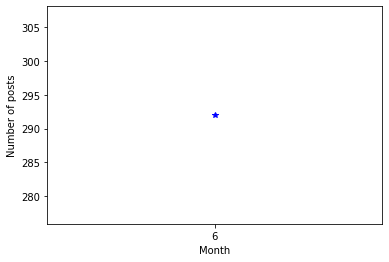

每月发帖数量为 [292]


In [4]:
#可视化每月发帖数量；

x = [i[0] for i in topic_time_dict_sorted]
y = [i[1] for i in topic_time_dict_sorted]

x_ = tuple([str(i) for i in x])

plt.plot(x, y, 'b*-')
plt.xticks(x, x_)
plt.yticks(fontsize=10)
plt.xlabel('Month')
plt.ylabel('Number of posts', fontsize=10)
#plt.legend()

plt.savefig(r'1.png', dpi=1000)

plt.show()

print('每月发帖数量为', y)

### 计算每天发帖数量；

In [5]:
#计算哪天发帖最多；
topic_without_time = [i.split(' ')[0] for i in list(topicUrl_time_filter_dict.values())]
# print(topic_without_time)
topic_time_day = ['.'.join(i.split('-')[1:]) for i in topic_without_time]
# print(topic_time_day)
topic_time_day_dict = dict(Counter(topic_time_day))
topic_time_day_dict_sorted = sorted([[i, j] for i, j in topic_time_day_dict.items()], key=lambda x:x[1], reverse=True)

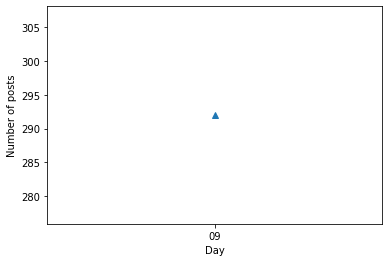

以天为粒度，发帖前数量为x： [292]


In [6]:
#可视化每天发帖数量（前10）；

x = [i[0] for i in topic_time_day_dict_sorted[:10]]
y = [i[1] for i in topic_time_day_dict_sorted[:10]]

x_ = tuple([str(i) for i in x])

plt.plot(x, y, '^-')
plt.xticks(x, x_)
plt.yticks(fontsize=10)
plt.xlabel('Day')
plt.ylabel('Number of posts', fontsize=10)
#plt.legend()

plt.savefig(r'2.png', dpi=1000)

plt.show()

print('以天为粒度，发帖前数量为x：', y)

### 计算用户发帖数量分布；

In [7]:
id_url = csv.id
topic_id = [[u, i] for i, u in zip(id_url, topic_url)]
topic_id_filter = [i for i in topic_id if str(i[0]).split(':')[0] == 'https']
id_topic_filter_dict = dict(topic_id_filter)
id_filter = sorted([[i, j]for i, j in dict(Counter(list(id_topic_filter_dict.values()))).items()], key=lambda x:x[1], reverse=True)

print('发帖数量前20的rcer：')
for i in id_filter[:20]:
    print(i)

发帖数量前20的rcer：
['https://www.douban.com/people/yanjipingping/', 5]
['https://www.douban.com/people/221095791/', 4]
['https://www.douban.com/people/Yh0531ID/', 3]
['https://www.douban.com/people/239510280/', 3]
['https://www.douban.com/people/188163813/', 3]
['https://www.douban.com/people/85140746/', 3]
['https://www.douban.com/people/234372988/', 3]
['https://www.douban.com/people/204088098/', 2]
['https://www.douban.com/people/138064768/', 2]
['https://www.douban.com/people/163677829/', 2]
['https://www.douban.com/people/226391836/', 2]
['https://www.douban.com/people/163654814/', 2]
['https://www.douban.com/people/190658746/', 2]
['https://www.douban.com/people/234056609/', 2]
['https://www.douban.com/people/202046642/', 2]
['https://www.douban.com/people/218655410/', 2]
['https://www.douban.com/people/235351145/', 2]
['https://www.douban.com/people/238917673/', 2]
['https://www.douban.com/people/159151849/', 2]
['https://www.douban.com/people/234515651/', 2]


In [8]:
print('共有', len(id_filter), '位用户发帖')

共有 255 位用户发帖


### 计算回帖用户数量分布及最赞回复用户数量；

In [9]:
reply_id = list(csv.reply_id)
topic_replyId= [[j, i] for i, j in zip(reply_id, topic_url)]
topic_replyId_dict = dict([i for i in topic_replyId if str(i[0]).split(':')[0] == 'https'])

topic_replyId_ = []
for key, value in topic_replyId_dict.items():
    v_re = re.split(r'["\']', value)
    v_re_ = []
    for v in v_re:
        if v not in ['[', ', ', ']', '[]']:
            v_re_.append(v)
    topic_replyId_.append([key, v_re_])

popular_idx = list(csv.popular_index)
topic_popularIdx = [[j, i] for i, j in zip(popular_idx, topic_url)]
topic_popularIdx_dict = dict([i for i in topic_popularIdx if str(i[0]).split(':')[0] == 'https'])

topic_replyIdList_dict = dict(topic_replyId_)

replyIdPopuAll_list = []
replyIdAll_list = []
for k, v in topic_popularIdx_dict.items():
    try:
        replyIdPopu_list = topic_replyIdList_dict[k][:int(v)]
        replyId_list = topic_replyIdList_dict[k][int(v):]
    except:
        continue
    replyIdPopuAll_list.append(replyIdPopu_list)
    replyIdAll_list.append(replyId_list)
    
replyIdPopuAll_list_ = sorted([[i, j] for i, j in dict(Counter([j for i in replyIdPopuAll_list for j in i])).items()], key=lambda x:x[1], reverse=True)
replyIdAll_list_ = sorted([[i, j] for i, j in dict(Counter([j for i in replyIdAll_list for j in i])).items()], key=lambda x:x[1], reverse=True)

print('最赞回复前20的哈er：')
for i in replyIdPopuAll_list_[:20]:
    print(i)

最赞回复前20的哈er：
['https://www.douban.com/people/150158475/', 11]
['https://www.douban.com/people/235391064/', 8]
['https://www.douban.com/people/239510280/', 7]
['https://www.douban.com/people/224480327/', 7]
['https://www.douban.com/people/188163813/', 7]
['https://www.douban.com/people/238917673/', 6]
['https://www.douban.com/people/223235014/', 6]
['https://www.douban.com/people/188381523/', 5]
['https://www.douban.com/people/227656096/', 5]
['https://www.douban.com/people/179800717/', 5]
['https://www.douban.com/people/189095593/', 5]
['https://www.douban.com/people/bbia147258/', 5]
['https://www.douban.com/people/234156528/', 5]
['https://www.douban.com/people/179945819/', 5]
['https://www.douban.com/people/85140746/', 5]
['https://www.douban.com/people/223280760/', 4]
['https://www.douban.com/people/204585587/', 4]
['https://www.douban.com/people/163654814/', 4]
['https://www.douban.com/people/159177391/', 4]
['https://www.douban.com/people/195996126/', 4]


In [10]:
print('回复数量前20的哈er：')
for i in replyIdAll_list_[:20]:
    print(i)

回复数量前20的哈er：
['https://www.douban.com/people/188163813/', 102]
['https://www.douban.com/people/221095791/', 79]
['https://www.douban.com/people/213882194/', 68]
['https://www.douban.com/people/179945819/', 68]
['https://www.douban.com/people/3550758/', 54]
['https://www.douban.com/people/222843837/', 51]
['https://www.douban.com/people/199347405/', 46]
['https://www.douban.com/people/230318741/', 46]
['https://www.douban.com/people/85140746/', 46]
['https://www.douban.com/people/235193679/', 45]
['https://www.douban.com/people/150158475/', 44]
['https://www.douban.com/people/163677829/', 43]
['https://www.douban.com/people/yyyyou1/', 42]
['https://www.douban.com/people/223235014/', 41]
['https://www.douban.com/people/188381523/', 41]
['https://www.douban.com/people/223302336/', 41]
['https://www.douban.com/people/198008319/', 41]
['https://www.douban.com/people/226695673/', 40]
['https://www.douban.com/people/236704581/', 40]
['https://www.douban.com/people/148305464/', 37]


### 计算帖子回应数量分布；

In [11]:
responses_num = list(csv.responses_num)
topic_responseNum = [[j, i] for i, j in zip(responses_num, topic_url)]
topic_responseNum_dict = dict([i for i in topic_responseNum if str(i[0]).split(':')[0] == 'https'])

topic_replyIdNums_dict = dict([[i[0], len(i[1])] for i in topic_replyId_])

topic_responseNum_dict_ = []
for i, j in topic_responseNum_dict.items():
    try:
        j = int(j)
        topic_responseNum_dict_.append([i, j])
    except:
        continue

topic_responseNum_sorted = sorted([[i, j] for i, j in dict(topic_responseNum_dict_).items()], key=lambda x:x[1], reverse=True)
topic_responseNum_filter = [[i[0], i[1]] for i in topic_responseNum_sorted if topic_replyIdNums_dict[i[0]] > 2]

print('回复数量前20的帖子：')
for i in topic_responseNum_filter[:20]:
    print(i)

回复数量前20的帖子：
['https://www.douban.com/group/topic/203399574/', 27533]
['https://www.douban.com/group/topic/224611080/', 26717]
['https://www.douban.com/group/topic/226161545/', 17847]
['https://www.douban.com/group/topic/202297456/', 10884]
['https://www.douban.com/group/topic/131301116/', 8528]
['https://www.douban.com/group/topic/229343092/', 7018]
['https://www.douban.com/group/topic/227974099/', 4952]
['https://www.douban.com/group/topic/227891637/', 4079]
['https://www.douban.com/group/topic/229024039/', 2496]
['https://www.douban.com/group/topic/228449509/', 2219]
['https://www.douban.com/group/topic/226011777/', 1238]
['https://www.douban.com/group/topic/156204162/', 1022]
['https://www.douban.com/group/topic/225489970/', 967]
['https://www.douban.com/group/topic/229234433/', 937]
['https://www.douban.com/group/topic/229663361/', 719]
['https://www.douban.com/group/topic/228448881/', 696]
['https://www.douban.com/group/topic/229606257/', 667]
['https://www.douban.com/group/topic/

In [12]:
top2000 = len([i[0] for i in topic_responseNum_sorted if i[1] >= 2000])
top2000_1500 = len([i[0] for i in topic_responseNum_sorted if 1500 <= i[1] < 2000])
top1500_1000 = len([i[0] for i in topic_responseNum_sorted if 1000 <= i[1] < 1500])
top1000_500 = len([i[0] for i in topic_responseNum_sorted if 500 <= i[1] < 1000])
top500_0 = len([i[0] for i in topic_responseNum_sorted if i[1] < 500])

In [13]:
top500_400 = len([i[0] for i in topic_responseNum_sorted if 400 <= i[1] < 500])
top400_300 = len([i[0] for i in topic_responseNum_sorted if 300 <= i[1] < 400])
top300_200 = len([i[0] for i in topic_responseNum_sorted if 200 <= i[1] < 300])
top200_100 = len([i[0] for i in topic_responseNum_sorted if 100 <= i[1] < 300])
top100_0 = len([i[0] for i in topic_responseNum_sorted if 0 <= i[1] < 100])
topMax100 = len([i[0] for i in topic_responseNum_sorted if i[1] > 100])

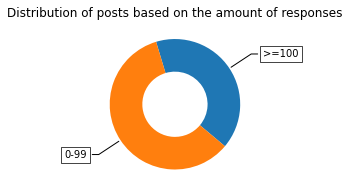

In [14]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ['>=100', '0-99']

data = [topMax100, top100_0]
#data_ = [top500_400, top400_300, top300_200, top200_100, top100_0]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title('Distribution of posts based on the amount of responses')

plt.savefig(r'4.png', dpi=1000)

plt.show()

### 计算哈er的发帖方式及回帖方式；

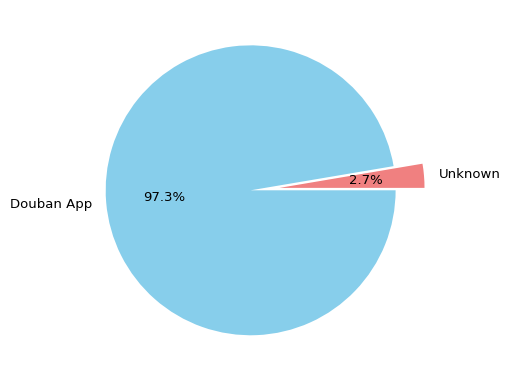

In [15]:
topic_ways = list(csv.topic_ways)
topic_topicWays = [[j, i] for i, j in zip(topic_ways, topic_url)]
topic_responseNum_dict = dict([i for i in topic_topicWays if str(i[0]).split(':')[0] == 'https'])

appWay = [j for i, j in topic_responseNum_dict.items() if j == '来自 豆瓣App']
my_dpi=95
plt.figure(figsize=(480/my_dpi,480/my_dpi),dpi=my_dpi)
plt.pie(x=[2351, 85800],
        labels=['Unknown', 'Douban App'],
        colors=["#F08080", "#87CEEB"],
        autopct='%1.1f%%',
        explode=(0.2, 0),
       )
plt.savefig(r'3.png', dpi=1000)
plt.show()

In [16]:
reply_ways = list(csv.replyWays)
topic_replyWays = [[j, i] for i, j in zip(reply_ways, topic_url)]
topic_replyWays_dict = dict([i for i in topic_replyWays if str(i[0]).split(':')[0] == 'https'])

topic_replyWays_list = []

for k, v in topic_replyWays_dict.items():
    try:
        #v_re = re.split(r'["\']', v)
        v_re = [i for i in re.split(r'["\']', v) if i not in ['[', ', ', ']', '[]']]
        topic_replyWays_list.append([k, v_re])
    except:
        continue

replyWays_list = [j for i in topic_replyWays_list for j in i[1]]
Counter(replyWays_list)

Counter({'来自 豆瓣App': 18083, '': 1338})

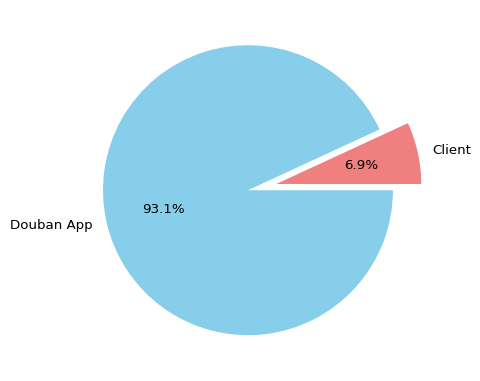

In [17]:
data = [dict(Counter(replyWays_list))[''], dict(Counter(replyWays_list))['来自 豆瓣App']]

my_dpi=96
plt.figure(figsize=(480/my_dpi,480/my_dpi),dpi=my_dpi)
plt.pie(x=data,
        labels=['Client', 'Douban App'],
        colors=["#F08080", "#87CEEB"],
        autopct='%1.1f%%',
        explode=(0.2, 0),#某部分突出显示，值越大，距离中心越远，该法可解决饼图字体重叠的问题
       )
plt.savefig(r'5.png', dpi=1000)
plt.show()

### 词云图；

In [18]:
import sys
!{sys.executable} -m pip install jieba
import jieba
docs = list(csv.docs)
topic_docs = [[j, i] for i, j in zip(docs, topic_url)]
topic_docs_dict = dict([i for i in topic_docs if str(i[0]).split(':')[0] == 'https'])

words = []
for i in topic_docs_dict.values():
    try:
        word_list = list(jieba.cut(i))
    except:
        continue
    words.extend(word_list)

words_s = ' '.join(words)
with open('baidu_stopwords.txt') as f1, open('cn_stopwords.txt') as f2, open('hit_stopwords.txt') as f3, open('scu_stopwords.txt') as f4:
    content = f1.readlines() + f2.readlines() + f3.readlines() + f4.readlines()
stop_words= list(set(x.strip() for x in content))
# print(stop_words)
wc = WordCloud(font_path=r'ZiZhiQuXiMaiTi-2.ttf',
               background_color='white',
               width=1000,
               height=800,
               stopwords=stop_words
               ).generate(words_s)
#wc.to_file('hahaha.png')

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/mh/bpzsthts2hj4bsmz9c65yh3r0000gn/T/jieba.cache
Loading model cost 1.189 seconds.
Prefix dict has been built successfully.


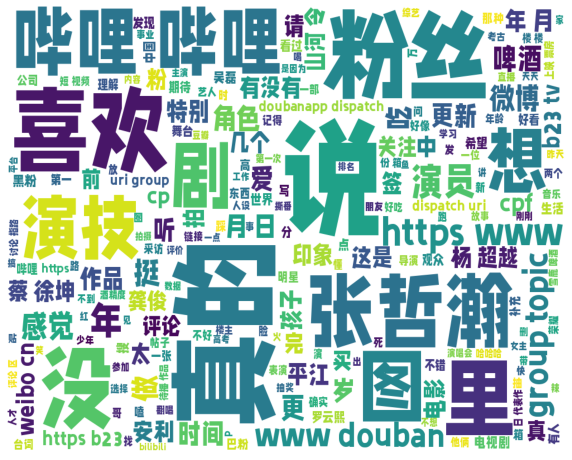

In [19]:
plt.figure(figsize = (10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

### 回复内容分析；

In [20]:
reply_content = list(csv.reply_content)

topic_replyContent= [[j, i] for i, j in zip(reply_content, topic_url)]
topic_replyContent_dict = dict([i for i in topic_replyContent if str(i[0]).split(':')[0] == 'https'])

reply_words = []
for i in topic_replyContent_dict.values():
    try:
        reply_word_list = list(jieba.cut(i))
    except:
        continue
    reply_words.extend(reply_word_list)

reply_words_s = ' '.join(reply_words)
reply_wc = WordCloud(font_path=r'ZiZhiQuXiMaiTi-2.ttf',
               background_color='white',
               width=5000,
               height=5000,
               stopwords=stop_words
               ).generate(reply_words_s)
#wc.to_file('hahaha.png')


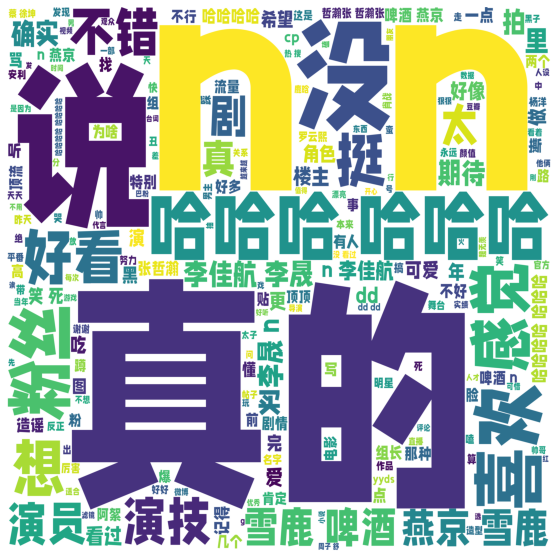

In [21]:
plt.figure(figsize = (10,10))
plt.imshow(reply_wc)
plt.axis('off')
plt.show()

In [22]:
topic_replyContent_ = []
for key, value in topic_replyContent_dict.items():
    try:
        v_rc = re.split(r'["\']', value)
        v_rc_ = []
        for v in v_rc:
            if v not in ['[', ', ', ']', '[]']:
                v_rc_.append(v)
    except:
        v_rc_ = []
    topic_replyContent_.append([key, v_rc_])

topic_replyContent_filter_dict = dict(topic_replyContent_)

replyContent_all = []
for k, v in topic_popularIdx_dict.items():
    try:
        r_c = topic_replyContent_filter_dict[k][int(v):]
        replyContent_all.append(r_c)
    except:
        continue
        
replyContent_all_ = [j for i in replyContent_all for j in i]


In [28]:
# reply_ha = [j for i in replyContent_all_ for j in i]
# reply_ha.count('哈')
r1 = re.compile(".*(肖战|土豆|那个男人|xz).*")
filtered_list1 = list(filter(r1.match, replyContent_all_)) # Read Note
print("回复含有肖战的数量", len(filtered_list1))
r2 = re.compile(".*(龚俊|\(\)|马|gj).*")
filtered_list2 = list(filter(r2.match, replyContent_all_)) # Read Note
print("回复含有龚俊的数量", len(filtered_list2))
r3 = re.compile(".*(张哲瀚|zzh|fz|组禁|二舅|(?<!土)豆).*")
filtered_list3 = list(filter(r3.match, replyContent_all_)) # Read Note
print("回复含有张哲瀚的数量", len(filtered_list3))
r4 = re.compile(".*(蔡徐坤|巨c|巨C|cxk).*")
filtered_list4 = list(filter(r4.match, replyContent_all_)) # Read Note
print("回复含有蔡徐坤的数量", len(filtered_list4))
r5 = re.compile(".*(王一博|小吴|脖|wyb|摩托).*")
filtered_list5 = list(filter(r5.match, replyContent_all_)) # Read Note
print("回复含有王一博的数量", len(filtered_list5))

回复含有肖战的数量 96
回复含有龚俊的数量 237
回复含有张哲瀚的数量 326
回复含有蔡徐坤的数量 73
回复含有王一博的数量 61


In [24]:
# replyContent_all_idx = []
# for k, v in topic_popularIdx_dict.items():
#     try:
#         r_c = topic_replyContent_filter_dict[k][int(v):]
#         replyContent_all_idx.append([k, r_c])
#     except:
#         continue

In [25]:
# url_haNum = []
# for i in replyContent_all_idx:
#     try:
#         chs = []
#         for j in i[1]:
#             ch = [m for m in j].count('哈')
#             chs.append(ch)
#         url_haNum.append([i[0], max(chs)])
#     except:
#         url_haNum.append([i[0], 0])

In [26]:
# sorted(url_haNum, key=lambda x:x[1], reverse=True)